In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas_profiling
import matplotlib.dates as mdates

## The datasets
>The data comes from [ClimateBC](http://climatebc.ca/) and [ClimateNA](http://climatena.ca/), two websites provided by Dr. Wang, a Professor in the Forestry Department at UBC in Vancouver. The websites provides tools to downscale meorological data from the PRISM climate group to observe long term and short term trends in the climate. With this, it is possible to choose any location in North America and receive highly detailed climate data for that location dating back to 1901.
The data is very extensive, so the difficulty lays in choosing which variables to observe and compare over time. For my project - determining the signs of climate change in ski resorts, it fits perfectly. By obtaining climate data for the location of several ski resorts in coastal and continental regions, I will be able to follow climatic trends that those regions are experiencing. Specifically the measurements {PAS - precipitation as snow} will prove useful in showing important developments for the ski resorts. Additionally, it is certainly helpful to compare the average temperature and the degree-days below 0°C {DD<0} to detect any major trends in the data. The degree-days below °C note how many days multiplied by how many degrees below freezing have occured in the measured timeline.
I expect to see an observable decline in precipitation as snow on the coastal ski resorts since those have been particularly affected by climate change.The changes in average temperature will also indicate if major changes have occured in the investigated locations. However, I also don't expect to see too many changes, potentially not even clearly destinguishable trends in the continental ski resorts. Some of the continental resorts might even show an improvement in ski conditions because climate change induced changes can even increase snowfall for continental locations for now.

## This dataset

>The dataset analyzed in this notebook covers data from Jackson Hole, a major ski resort in the Tetons in Wyoming. Due to it's geophysical location, Jackson Hole is considered a continental resort.

In [3]:
# exploring dataframe for a specific location
# key to important variables is in (..\data\raw\README.md)
df = pd.read_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\Jackson_Hole.csv')

In [4]:
# let's take a closer look some annual variables:
# Selecting specific columns since the dataset would be too big to run otherwise.
# Warning: loading this might take quite a bit of processing time.

df_annual = df.iloc[:,[4,5,6,12,13,16,20,26]]
df_annual_c = df_annual.copy()
df_annual_c.profile_report()

In [5]:
df_winter = df.iloc[:,[27,31,35,39,43,47,51,55,59,63,67,71,75,79]]
df_winter_c = df_winter.copy()
df_winter_c.profile_report()

# Data Wrangling

In [2]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from project_function import project_function as pj
pj.load_and_process(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\Jackson_Hole.csv')

In [4]:
# saving output data into files

pj.monthly_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\Jackson_months.csv', index=False)
pj.seasonal_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\Jackson_seasons.csv', index=False)
pj.annual_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\Jackson_years.csv', index=False)

# Research questions

- Is climate change affecting ski resorts in North America? 
- How does it show?

### Subquestions
- Are there any variables in the data which show distinctive trends over the investigated time?
- Are those variables generally associated with climate change?
- How do coastal ski resorts compare to continental ski resorts?

# Analysis and visualizations of the cleaned data

### Seasonal winter data

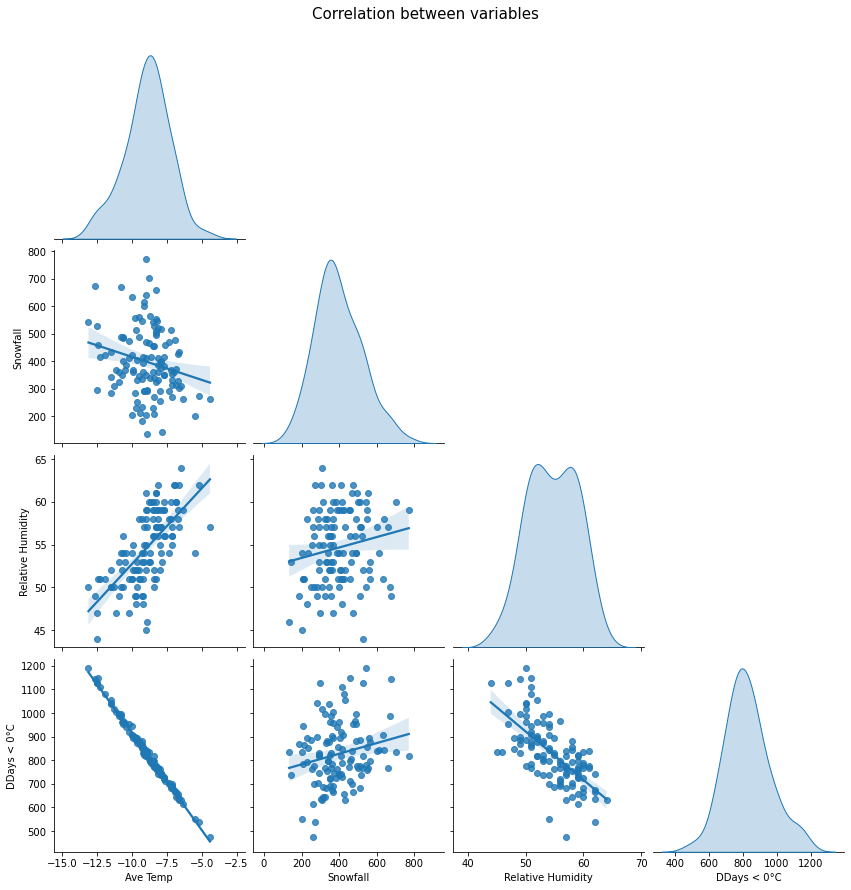

In [5]:
# Trying to observe potential correlations between different variables at seasonal observations

selected_df_winter = pj.seasonal_data.loc[:,['Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
sns.pairplot(selected_df_winter, 
             kind = 'reg', 
             diag_kind='kde', 
             height=3,
             corner=True
            )
plt.suptitle('Correlation between variables', y=1.03, fontsize=15)

plt.savefig(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502/images/Jackson_cor_Y')

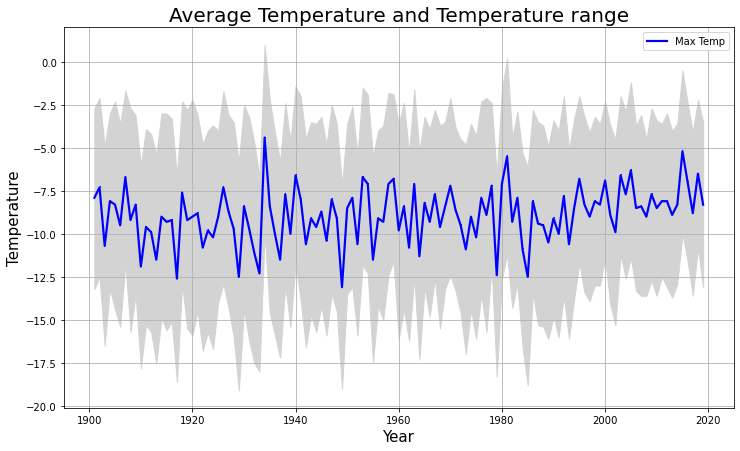

In [6]:
# Let's investigate how some variables change over time.

X  = np.linspace(0,3,200)
# Visualizing average, max, min winter termperatures over time
plt.figure(figsize = (12,7))
plt.plot('Year', 'Ave Temp', data=pj.seasonal_data, linestyle='solid', marker=',', color='blue', lw=2.2)

# no need to plot max and min when shading the area in between lines
# plt.plot('Year', 'Max Temp', data=seasonal_data, linestyle='solid', marker=',', color='salmon')
# plt.plot('Year', 'Min Temp', data=seasonal_data, linestyle='solid', marker=',', color='salmon')

# Creating labels, legend and the grid
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.legend(['Max Temp', 'Ave Temp', 'Min Temp'])
plt.title('Average Temperature and Temperature range', fontsize = 20)
plt.grid(True)

# filling the area between maximum and minimum temperature
plt.fill_between(pj.seasonal_data['Year'],pj.seasonal_data['Max Temp'],pj.seasonal_data['Min Temp'], color='lightgrey')

plt.savefig(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502/images/Jackson_temp_range_Y')

> Quite cold temperatures here with the usual warming trend and the decrease in temperature range. The average temperature seems to vary (oscillate) less than in other locations.

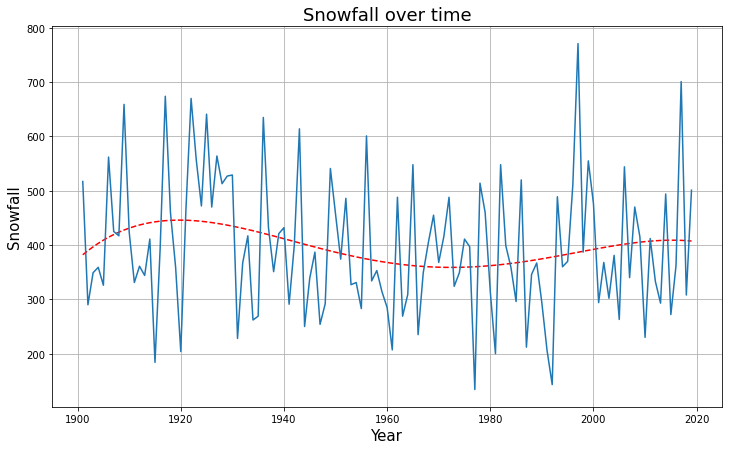

In [7]:
# Same graph with added trendline

# Setting up the plot and parameters for the trendline
X = np.array(pj.seasonal_data['Year'])
Y = np.array(pj.seasonal_data['Snowfall'])
fig, ax = plt.subplots(figsize = (12,7))
np.shape(X)
np.shape(Y)

# Fitting in a trendline of 4th degree
Z = np.polyfit(X, Y, 4)
ZZ = np.poly1d(Z)
ax.plot(X, ZZ(X),'r--')
ax.plot(X, Y)

# adding labels, title and grid
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Snowfall', fontsize = 15)
plt.title('Snowfall over time', fontsize = 18)
plt.grid(True)

plt.savefig(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502/images/Jackson_snow_Y')

> Over the years there isn't a lot of change in the snowfall amounts and no clear upward or downward trend.

### Monthly data

> Sicne there is monthly data for the entire record available, I will analyze important variables with that data as well. The results should be more exact and better to draw conclusions from. With the amount of data however, plots easily become chaotic.

In [8]:
# Specifying the months of interest. The different lists of months serves to investigate the data from different perspectives.
winter_months_2 = ['Jan', 'Feb']
winter_months_3 = ['Dec', 'Jan', 'Feb']
winter_months_5 = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']
winter_months_7 = ['Oct','Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']

# Some of the following graphs turn messy or simply don't work when dealing with too many months, hence the ability to specify
# which months to use for the visualisations here.


# Merging the Month and the Year into one column
# In order to use different months in the following graphs it simply needs a tiny adjustment in the following line of code! 
monthly_data_winter = pj.monthly_data.loc[pj.monthly_data['Month'].isin(winter_months_7)]
monthly_data_winter = monthly_data_winter.assign(Year_month = monthly_data_winter.Year.astype(str) + ' ' + monthly_data_winter.Month.astype(str))

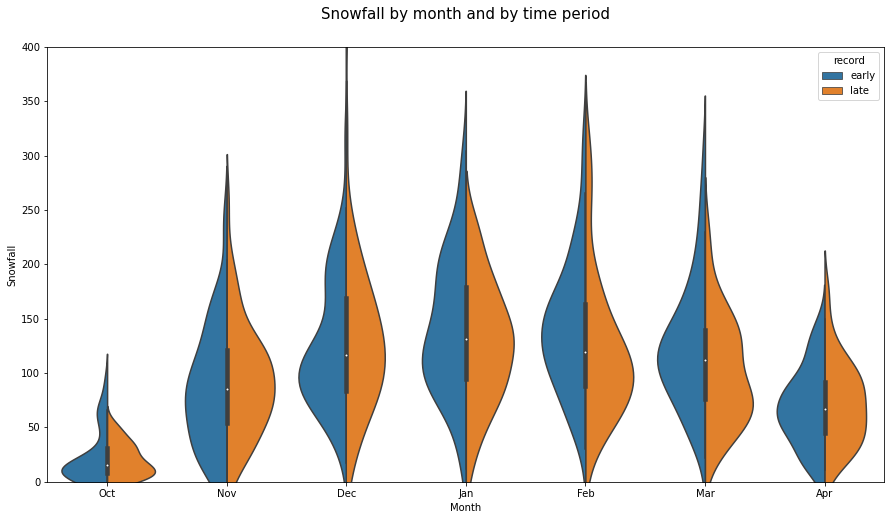

In [9]:
# Eplore what amounts of snowfall we're dealing with per month

# Adding a column to the monthly_data_winter dataframe to be able chronologically split data between 1901 and 2019 in half.
time_record = []
for year in monthly_data_winter['Year']:
    
    if year <= 1960:
        time_record.append('early')
    else:
        time_record.append('late')

time_record2 = np.array(time_record).T
monthly_data_winter = monthly_data_winter.assign(record = time_record2)


# Plotting the monthly snowfall in a violinplot with hue being the two periods in the record.
fig, ax = plt.subplots(figsize = (15,8))
snow_per_month = sns.violinplot(x='Month', 
                                y='Snowfall', 
                                data=monthly_data_winter,
                                order = ('Oct','Nov','Dec','Jan','Feb','Mar', 'Apr'),
                                hue = 'record',
                                split = True
                               
                               )

snow_per_month.set_ylim([0,400])
plt.title('Snowfall by month and by time period', y=1.05, fontsize=15)
# plt.grid(True)

plt.savefig(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502/images/Jackson_snow2_vio_M7')

> The snowfall distributions don't increase or decrease significantly. Noticeable again that the newer February snowfall is characterized by lower levels.

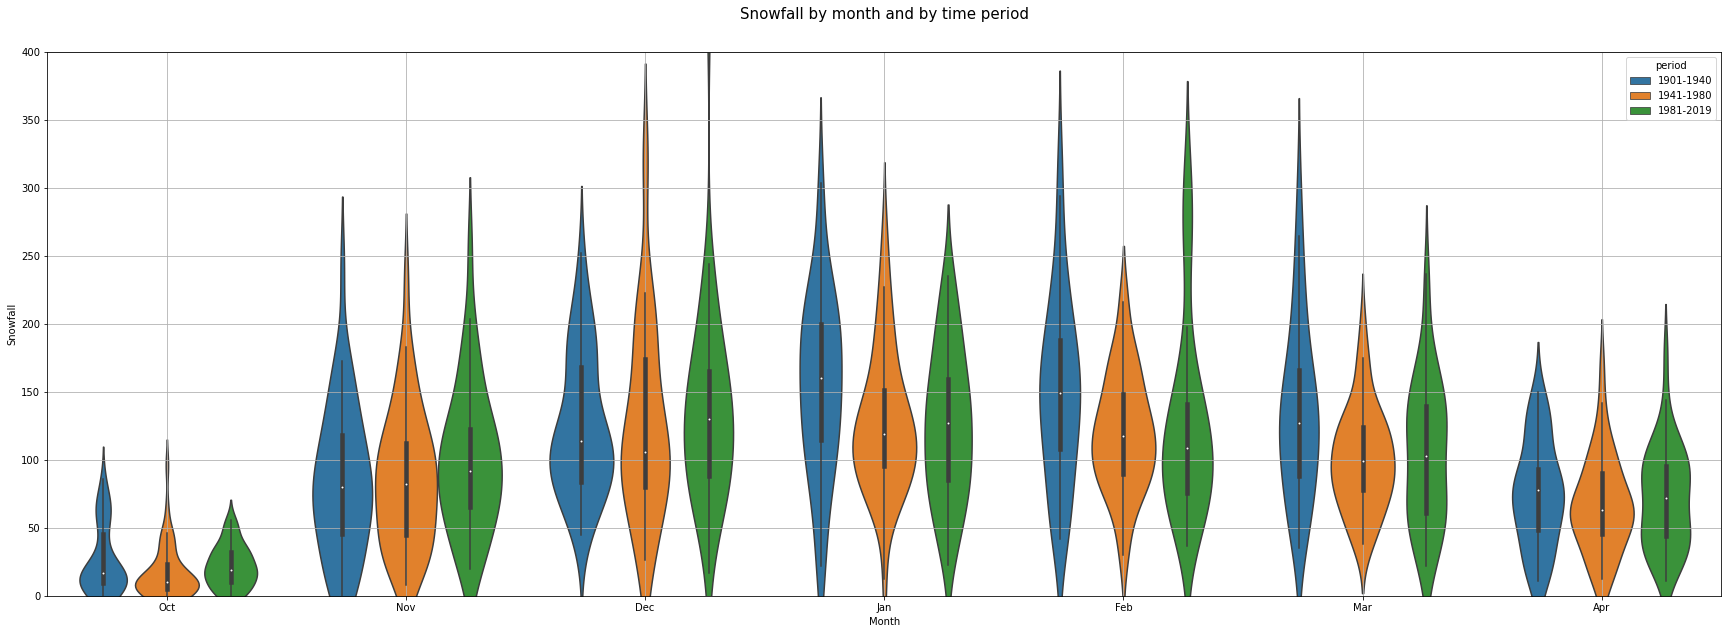

In [10]:
# Same plot, but differenciating between 3 distince periods in the record.

# Adding a column to the monthly_data_winter dataframe to be able chornologically split data between 1901 and 2019 in thirds.
time_record_3 = []
for year in monthly_data_winter['Year']:
    
    if year <= 1940:
        time_record_3.append('1901-1940'),
    elif year > 1940 and year <= 1980:
        time_record_3.append('1941-1980'),
    else:
        time_record_3.append('1981-2019')
         
time_record2 = np.array(time_record).T
monthly_data_winter = monthly_data_winter.assign(period = time_record_3)


# Plotting the monthly snowfall
fig, ax = plt.subplots(figsize = (30,10))
snow_per_month = sns.violinplot(x='Month', 
                                y='Snowfall', 
                                data=monthly_data_winter,
                                order = ('Oct','Nov','Dec','Jan','Feb','Mar', 'Apr'),
                                hue = 'period',
                               )

snow_per_month.set_ylim([0,400])
plt.title('Snowfall by month and by time period', y=1.05, fontsize=15)
plt.grid(True)

plt.savefig(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502/images/Jackson_snow3_vio_M7')

> The violinplots show that higher snowfall used to be more common in the early 20th century. The intermediate and late records don't vary much.

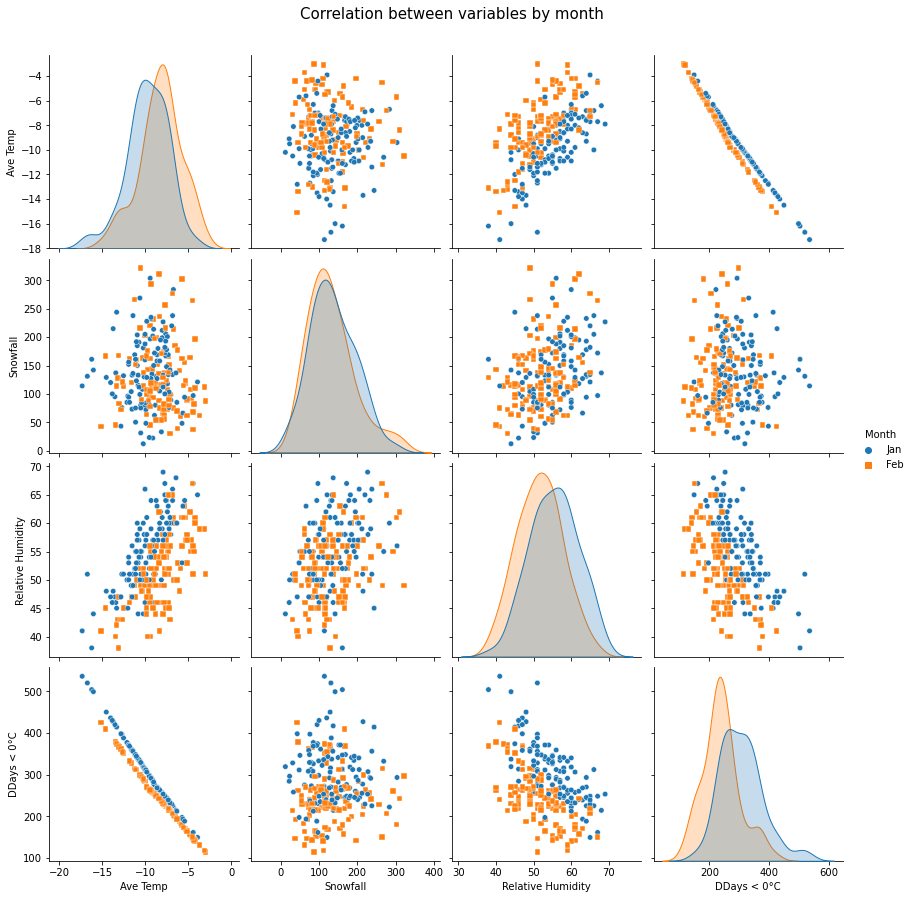

In [17]:
# Plotting correlations by month. Let's see if it changes from the seasonal data.
# This plot get's too messy if using more than two months to compare.

# Upper right corner different plot?
selected_df_winter_months = monthly_data_winter.loc[:,['Month','Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
sns.pairplot(selected_df_winter_months, 
             kind = 'scatter', 
             diag_kind='kde', 
             height=3,
             markers=['o','s'], #,'D' for additional month
             plot_kws={'s':30},
             hue='Month'   # Using hue only really works for spectating a maximum of three months at a time. More months areoverwhelming.
) 
plt.suptitle('Correlation between variables by month', y=1.04, fontsize=15)

plt.savefig(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502/images/Jackson_cor_M')

> Very similarly spread data between January and February

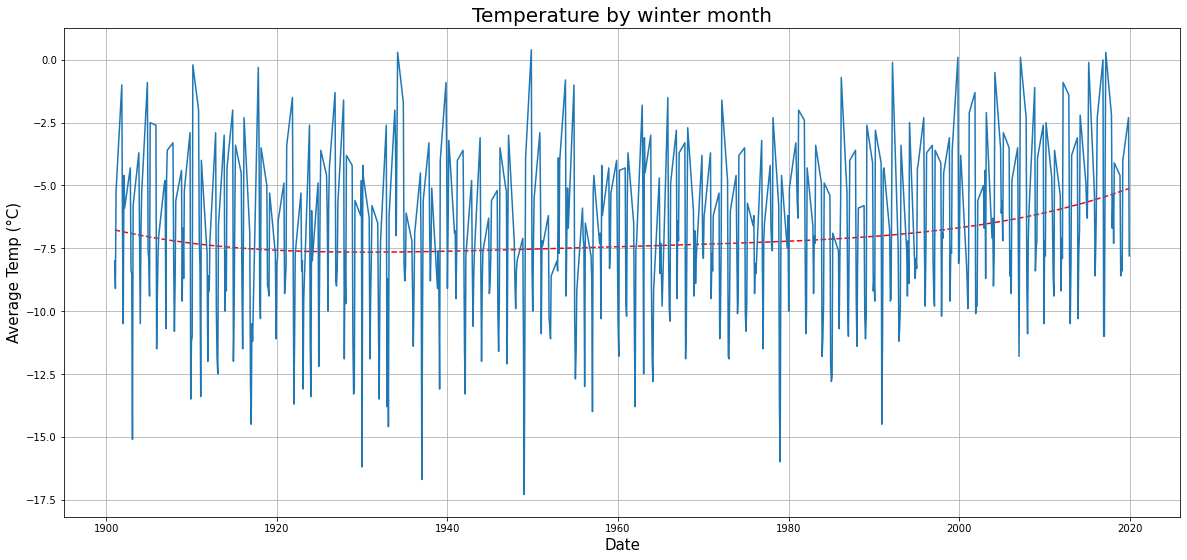

In [19]:
# plotting the Temperature trend with the monthly data.

# turn string into date format, then date to Matplotlib date numbers for the trendline
monthly_data_winter = monthly_data_winter.assign(Year_month2 = pd.to_datetime(monthly_data_winter['Year_month']).dt.date)
num_dates = mdates.date2num(monthly_data_winter['Year_month2'])

# setting up the plot and the trendline
X = np.array(num_dates)
Y = np.array(monthly_data_winter['Ave Temp'])
fig, ax = plt.subplots(figsize = (20,9))
np.shape(X)
np.shape(Y)
Z = np.polyfit(X, Y, 4)
ZZ = np.poly1d(Z)
ax.plot(X, ZZ(X),'r--')
ax.plot(X, Y)

# labels, title and grid
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Average Temp (°C)', fontsize = 15)
plt.title('Temperature by winter month', fontsize = 20)
plt.grid(True)

# Show X-axis major tick marks as dates, impossible to read with all ticks showing
loc = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate

plt.savefig(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502/images/Jackson_temp_M')

> The typical rise in temperatures becomes steeper in recent times.

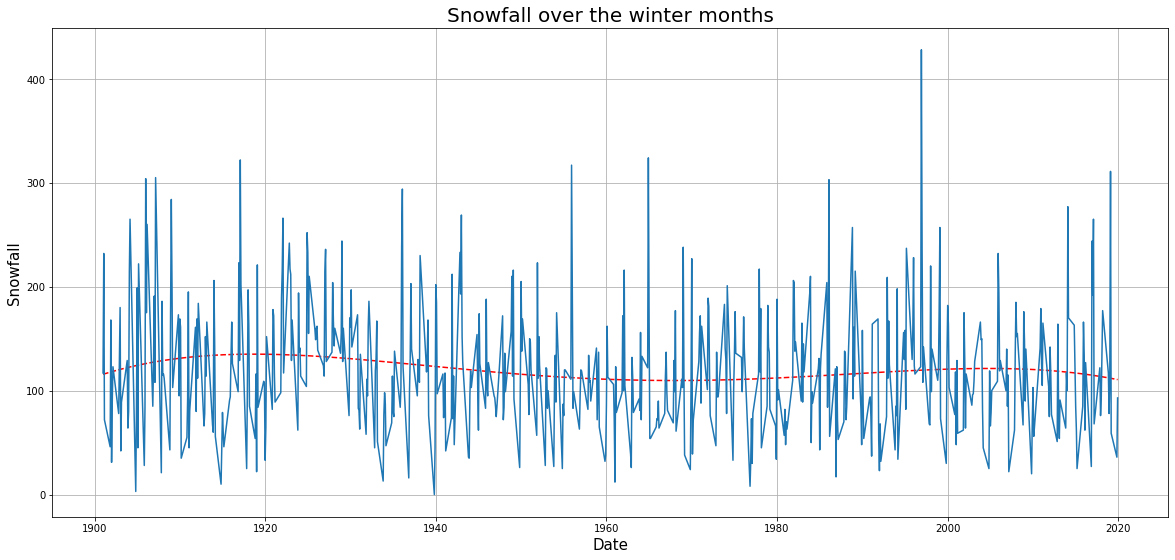

In [20]:
# Snowfall in single winter months

# setting up plot and trendline
X = np.array(num_dates)
Y = np.array(monthly_data_winter['Snowfall'])
fig, ax = plt.subplots(figsize = (20,9))
np.shape(X)
np.shape(Y)
Z = np.polyfit(X, Y, 4)
ZZ = np.poly1d(Z)
ax.plot(X, ZZ(X),'r--')
ax.plot(X, Y)

# labels, title and grid
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Snowfall', fontsize = 15)
plt.title('Snowfall over the winter months', fontsize = 20)
plt.grid(True)

# Show X-axis major tick marks as dates
loc = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate

plt.savefig(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502/images/Jackson_snow_M')

> The snowfall amounts are very steady at Jackson Hole

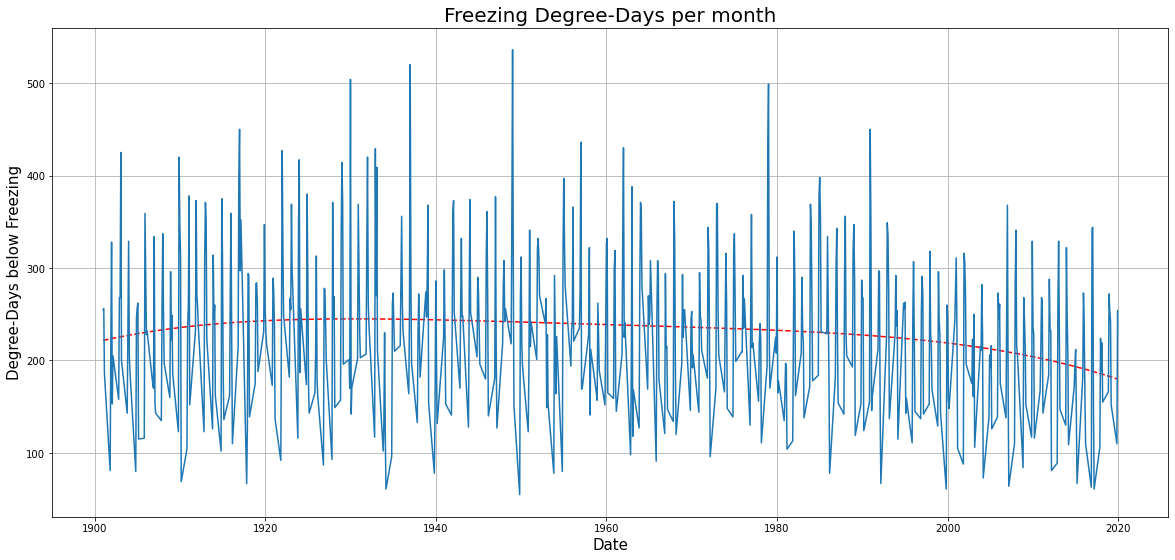

In [21]:
# Turn string into date format, then date to Matplotlib date numbers for the trendline
monthly_data_winter = monthly_data_winter.assign(Year_month2 = pd.to_datetime(monthly_data_winter['Year_month']).dt.date)
num_dates = mdates.date2num(monthly_data_winter['Year_month2'])

# Set up the plot and the trendlin
X = np.array(num_dates)
Y = np.array(monthly_data_winter['DDays < 0°C'])
fig, ax = plt.subplots(figsize = (20,9))
np.shape(X)
np.shape(Y)
Z = np.polyfit(X, Y, 4)
ZZ = np.poly1d(Z)
ax.plot(X, ZZ(X),'r--')
ax.plot(X, Y)

# labels, title and grid
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Degree-Days below Freezing', fontsize = 15)
plt.title('Freezing Degree-Days per month', fontsize = 20)
plt.grid(True)

# Show X-axis major tick marks as dates
loc = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate

plt.savefig(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502/images/Jackson_DD0_M')

> There is a steady decline in Degree-Days below Freezing since the mid-20th century with a steeper decline in the later record.

# Conclusions

- Jackson Hole, WY sees increasing temperatures, but the snowfall levels don't seem to be affected by that development(yet).
- It becomes a regular pattern at this point (6 ski resorts analyzed so far) that the more recent February snowfall is lower than it used to be in the beginning of the 20th century.